# Explore here

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [8]:
#1 Carga del conjunto de datos
resource_url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

# 2Nombre y ruta de la carpeta para datos en crudo
raw_data_folder = "data/raw"
raw_data_path = os.path.join(raw_data_folder, "diabetes.csv")

# Crear la carpeta si no existe
if not os.path.exists(raw_data_folder):
    os.makedirs(raw_data_folder)

# Petición para descargar el fichero
response = requests.get(resource_url)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Guardar el contenido en la carpeta en crudo
    with open(raw_data_path, 'wb') as file:
        file.write(response.content)
    print("Archivo guardado en crudo exitosamente en:", raw_data_path)
else:
    print("Error al descargar el archivo:", response.status_code)

# Leer el archivo CSV descargado 
df = pd.read_csv(raw_data_path)

Archivo guardado en crudo exitosamente en: data/raw/diabetes.csv


In [9]:
df.shape

(768, 9)

In [13]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape

(614, 8)

In [14]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [15]:
X_test.shape

(154, 8)

In [16]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


In [19]:
#Eliminacion de duplicados
duplicados = X_train.duplicated()
num_duplicados = duplicados.sum()

print(num_duplicados)

0


In [20]:
#Analisis univariante
#Sobre variables categóricas
X_train.Pregnancies.value_counts()

Pregnancies
1     116
0      91
2      75
3      64
4      52
5      45
6      44
7      35
8      28
9      22
10     19
11      8
13      6
12      5
14      2
15      1
17      1
Name: count, dtype: int64

In [21]:
#Analisis univariante
#Sobre variables categóricas
X_train.Glucose.value_counts()

Glucose
99     16
100    15
125    13
108    12
106    12
       ..
198     1
178     1
167     1
199     1
74      1
Name: count, Length: 133, dtype: int64

In [22]:
#Analisis univariante
#Sobre variables categóricas
X_train.Age.value_counts()

Age
22    59
21    51
25    40
24    36
23    31
26    30
27    27
28    26
31    21
41    19
29    19
30    17
37    16
33    15
42    14
45    13
46    13
32    12
36    12
34    12
40    11
35    10
38    10
43     9
39     8
52     8
51     7
47     6
50     6
44     5
49     4
57     4
48     4
66     4
54     4
53     3
55     3
58     3
59     3
69     2
61     2
67     2
63     2
60     2
56     2
65     1
70     1
72     1
68     1
62     1
64     1
81     1
Name: count, dtype: int64

In [23]:
#Analisis univariante
#Sobre variables categóricas
X_train.Insulin.value_counts()

Insulin
0      290
105     11
140      9
130      7
120      7
      ... 
55       1
85       1
61       1
237      1
235      1
Name: count, Length: 167, dtype: int64

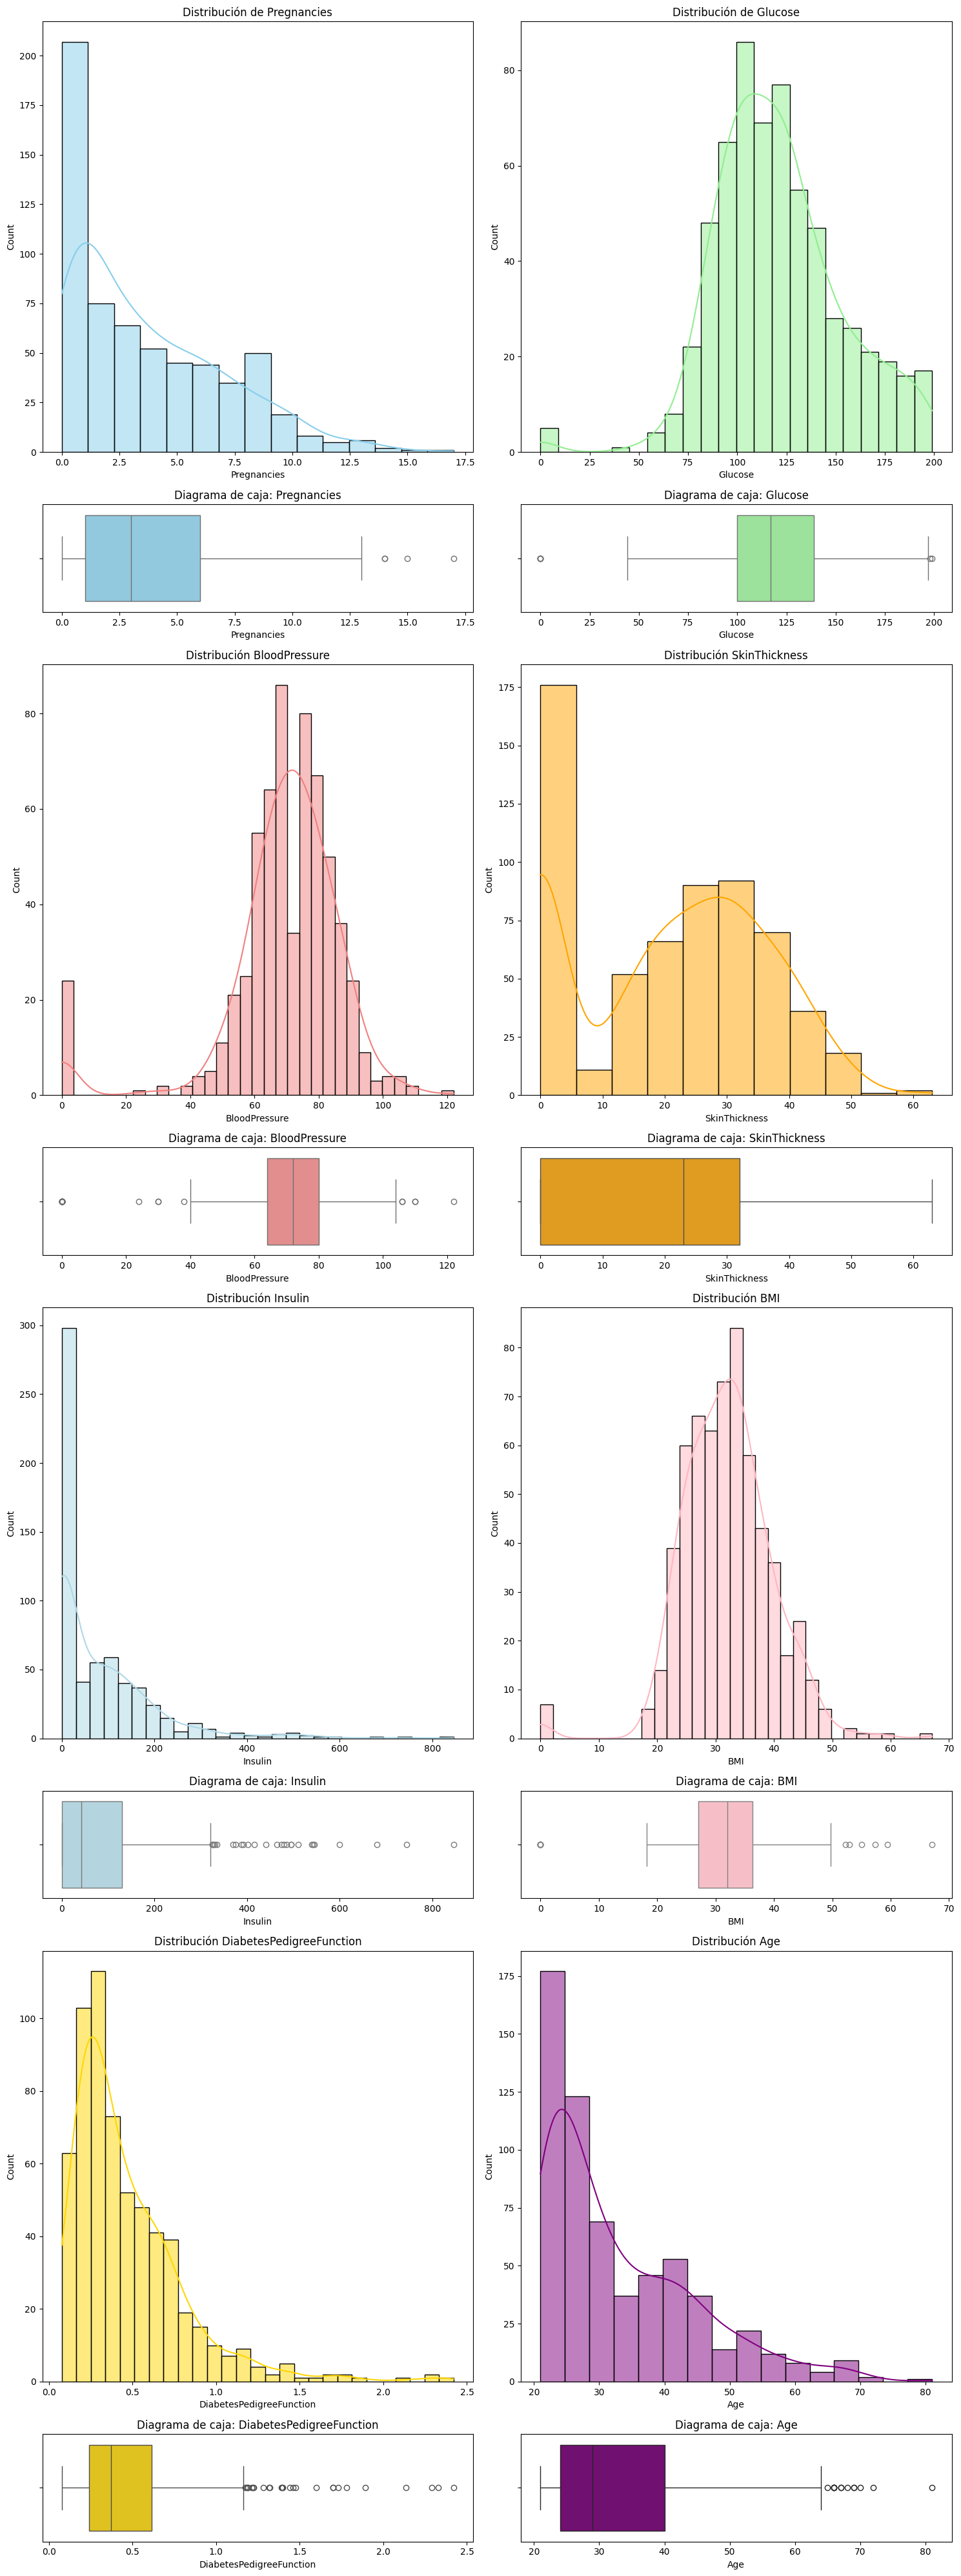

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los subplots (8 filas, 2 columnas) con height_ratios corregido
fig, axis = plt.subplots(8, 2, figsize=(15, 40), gridspec_kw={'height_ratios': [4, 1, 4, 1, 4, 1, 4, 1]})

# Histograma y diagrama de caja para cada variable

# Pregnancies
sns.histplot(ax=axis[0, 0], data=X_train, x="Pregnancies", kde=True, color="skyblue").set(title="Distribución de Pregnancies")
sns.boxplot(ax=axis[1, 0], data=X_train, x="Pregnancies", color="skyblue").set(title="Diagrama de caja: Pregnancies")

# Glucose
sns.histplot(ax=axis[0, 1], data=X_train, x="Glucose", kde=True, color="lightgreen").set(title="Distribución de Glucose")
sns.boxplot(ax=axis[1, 1], data=X_train, x="Glucose", color="lightgreen").set(title="Diagrama de caja: Glucose")

# BloodPressure
sns.histplot(ax=axis[2, 0], data=X_train, x="BloodPressure", kde=True, color="lightcoral").set(title="Distribución BloodPressure")
sns.boxplot(ax=axis[3, 0], data=X_train, x="BloodPressure", color="lightcoral").set(title="Diagrama de caja: BloodPressure")

# SkinThickness
sns.histplot(ax=axis[2, 1], data=X_train, x="SkinThickness", kde=True, color="orange").set(title="Distribución SkinThickness")
sns.boxplot(ax=axis[3, 1], data=X_train, x="SkinThickness", color="orange").set(title="Diagrama de caja: SkinThickness")

# Insulin
sns.histplot(ax=axis[4, 0], data=X_train, x="Insulin", kde=True, color="lightblue").set(title="Distribución Insulin")
sns.boxplot(ax=axis[5, 0], data=X_train, x="Insulin", color="lightblue").set(title="Diagrama de caja: Insulin")

# BMI
sns.histplot(ax=axis[4, 1], data=X_train, x="BMI", kde=True, color="lightpink").set(title="Distribución BMI")
sns.boxplot(ax=axis[5, 1], data=X_train, x="BMI", color="lightpink").set(title="Diagrama de caja: BMI")

# DiabetesPedigreeFunction
sns.histplot(ax=axis[6, 0], data=X_train, x="DiabetesPedigreeFunction", kde=True, color="gold").set(title="Distribución DiabetesPedigreeFunction")
sns.boxplot(ax=axis[7, 0], data=X_train, x="DiabetesPedigreeFunction", color="gold").set(title="Diagrama de caja: DiabetesPedigreeFunction")

# Age
sns.histplot(ax=axis[6, 1], data=X_train, x="Age", kde=True, color="purple").set(title="Distribución Age")
sns.boxplot(ax=axis[7, 1], data=X_train, x="Age", color="purple").set(title="Diagrama de caja: Age")

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()




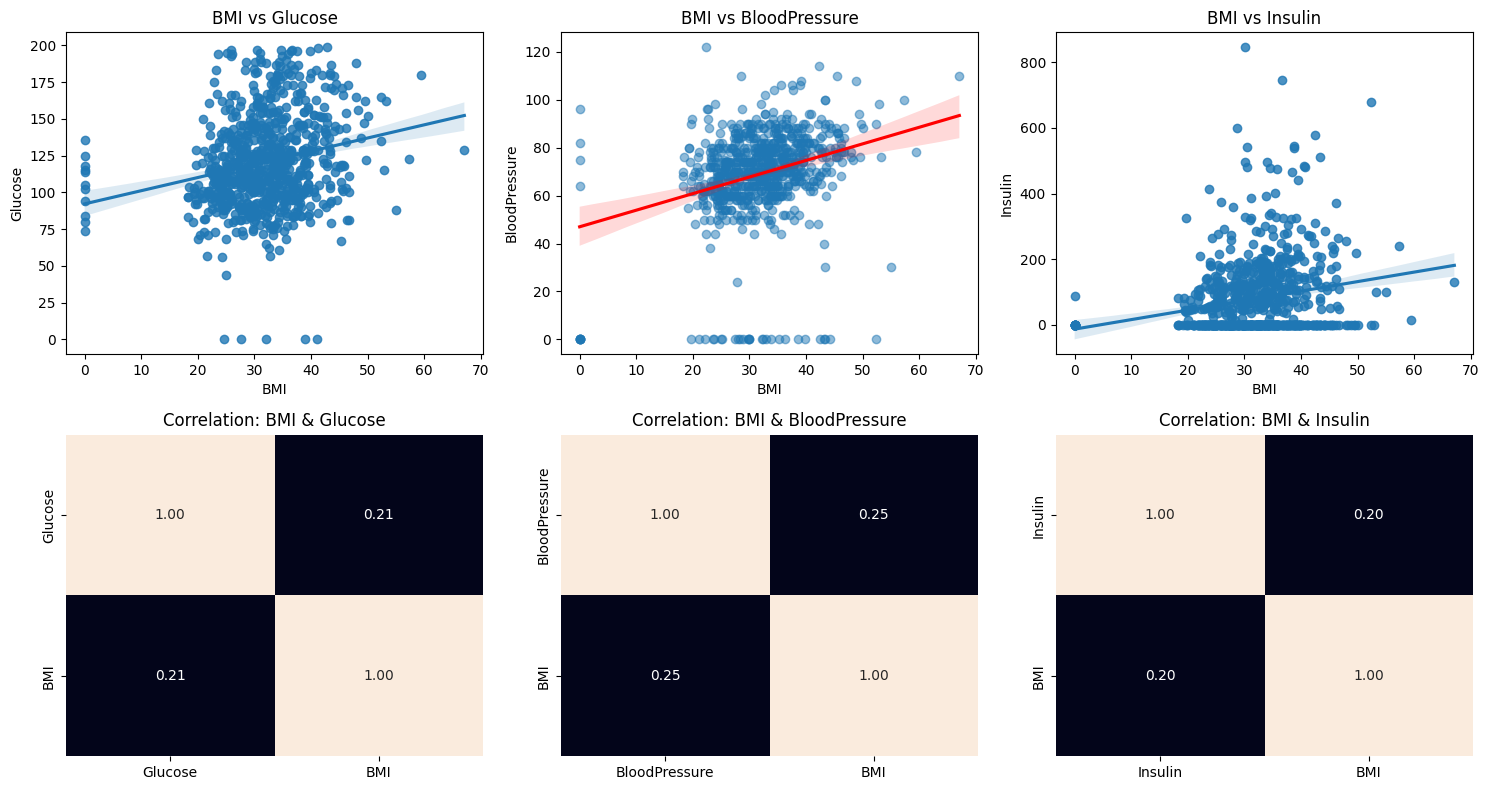

In [47]:
ig, axis = plt.subplots(2, 3, figsize=(15, 8))

# Gráfico 1: Precio vs Minimum Nights
sns.regplot(ax=axis[0, 0], data=df, x="BMI", y="Glucose")
sns.heatmap(X_train[["Glucose", "BMI"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[0, 0].set_title("BMI vs Glucose")
axis[1, 0].set_title("Correlation: BMI & Glucose")

# Gráfico 2: Precio vs Reviews Per Month
sns.regplot(ax=axis[0, 1], data=df, x="BMI", y="BloodPressure", scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
sns.heatmap(X_train[["BloodPressure", "BMI"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[0, 1].set_title("BMI vs BloodPressure")
axis[1, 1].set_title("Correlation: BMI & BloodPressure")

# Gráfico 3: Precio vs Number of Reviews
sns.regplot(ax=axis[0, 2], data=df, x="BMI", y="Insulin")
sns.heatmap(X_train[["Insulin", "BMI"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)
axis[0, 2].set_title("BMI vs Insulin")
axis[1, 2].set_title("Correlation: BMI & Insulin")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


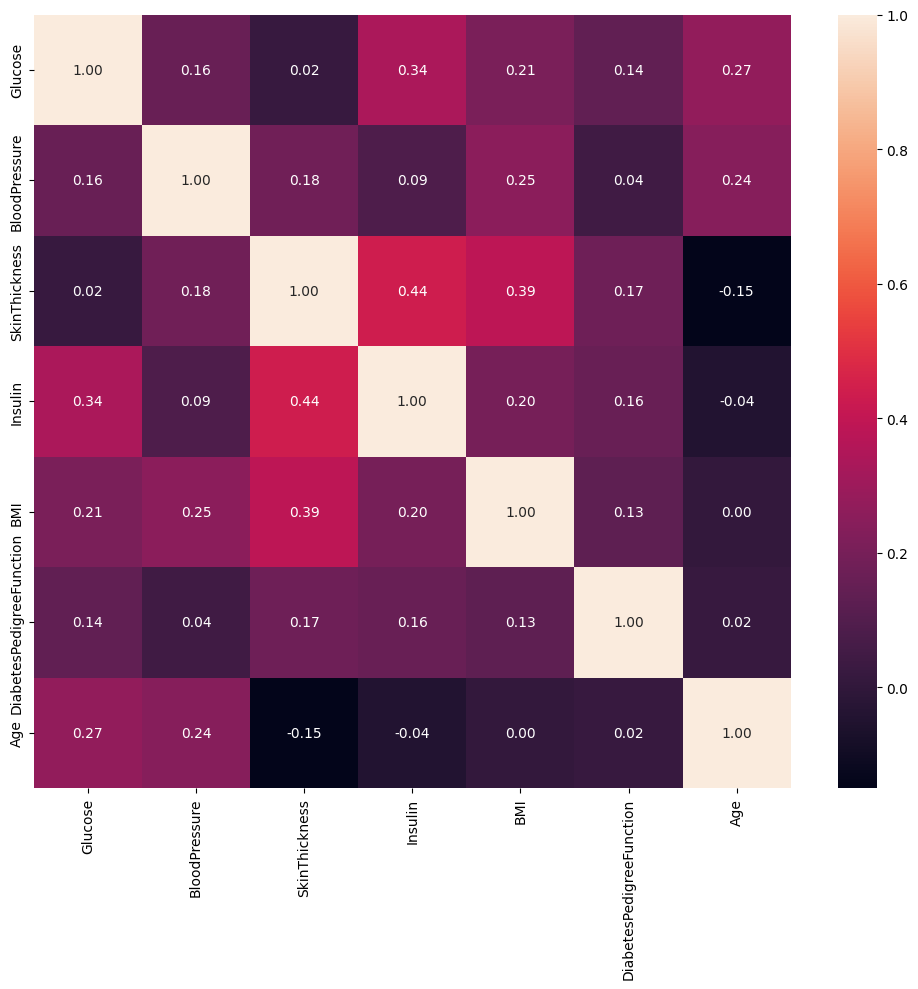

In [45]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(X_train[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

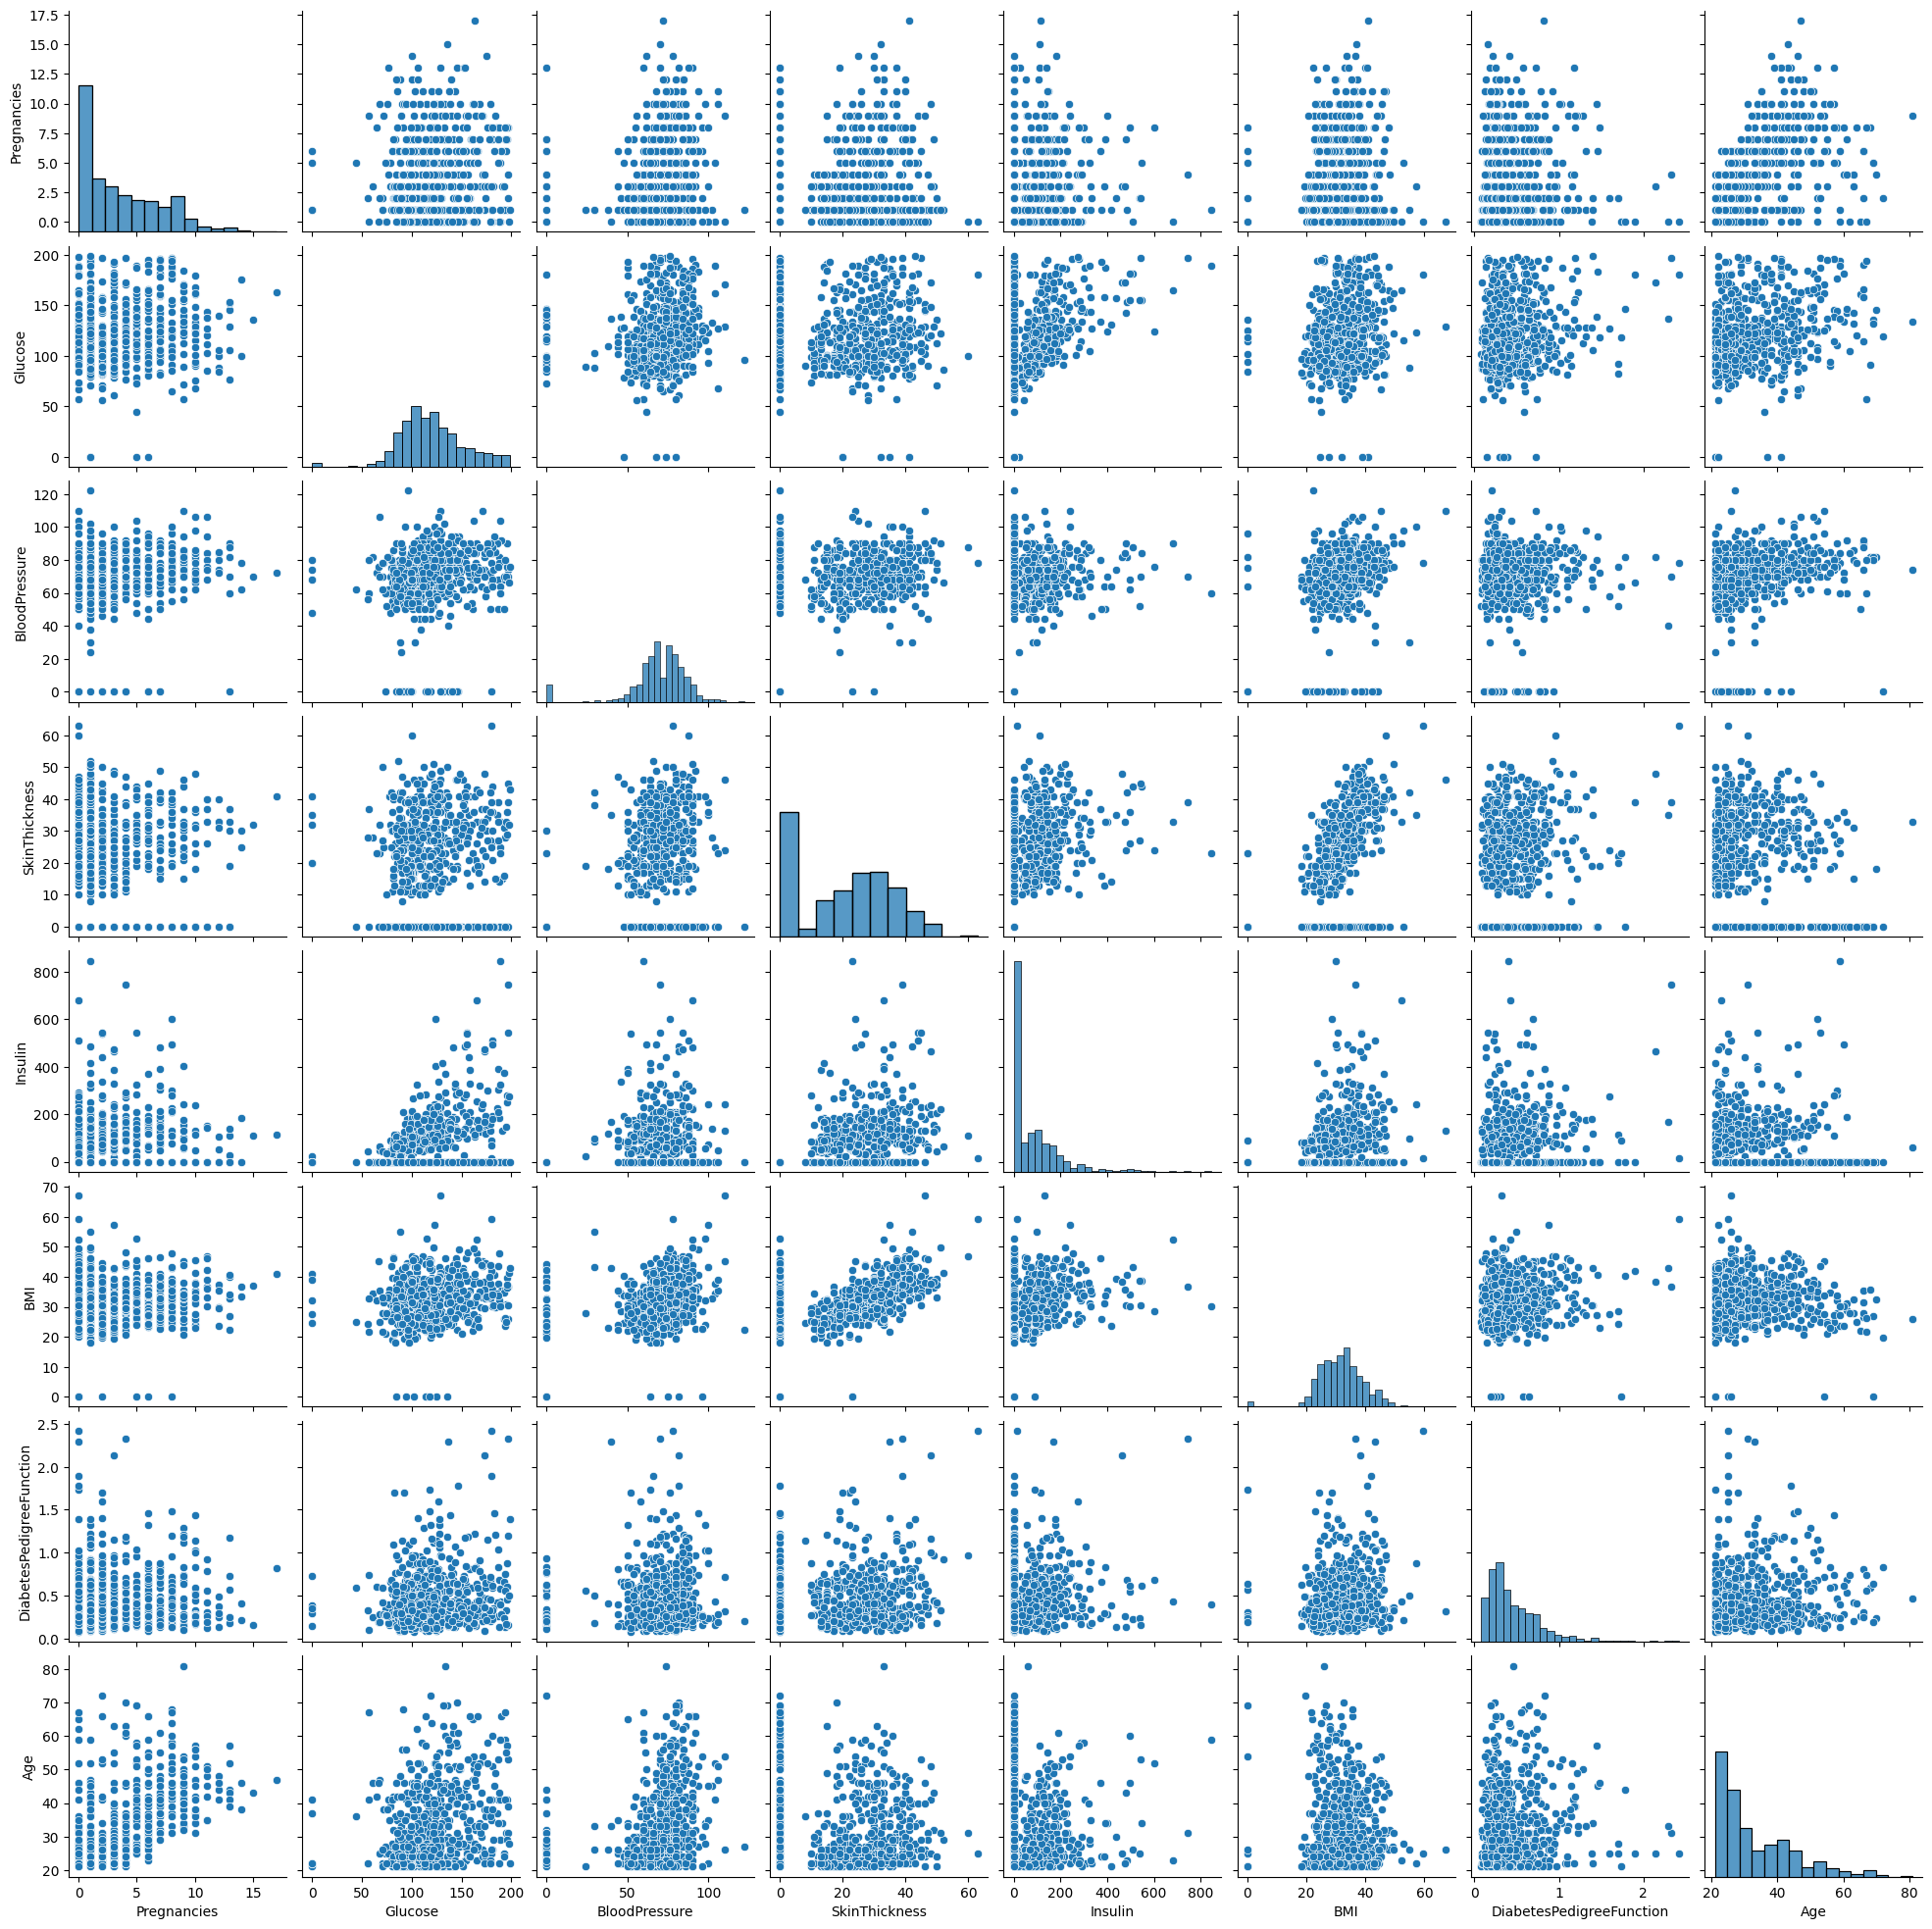

In [44]:
# relaciones todos con todos
sns.pairplot(data = X_train)

In [54]:
#ESCALADO

# Min-Max scaler
from sklearn.preprocessing import MinMaxScaler


num_variables = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age" ]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(X_train[num_variables])     
df_scal = pd.DataFrame(scal_features, index = X_train.index, columns = num_variables)
df_scal.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
618,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
346,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
294,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
231,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


In [61]:
# modelo
model = DecisionTreeClassifier(random_state = 42)

# entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

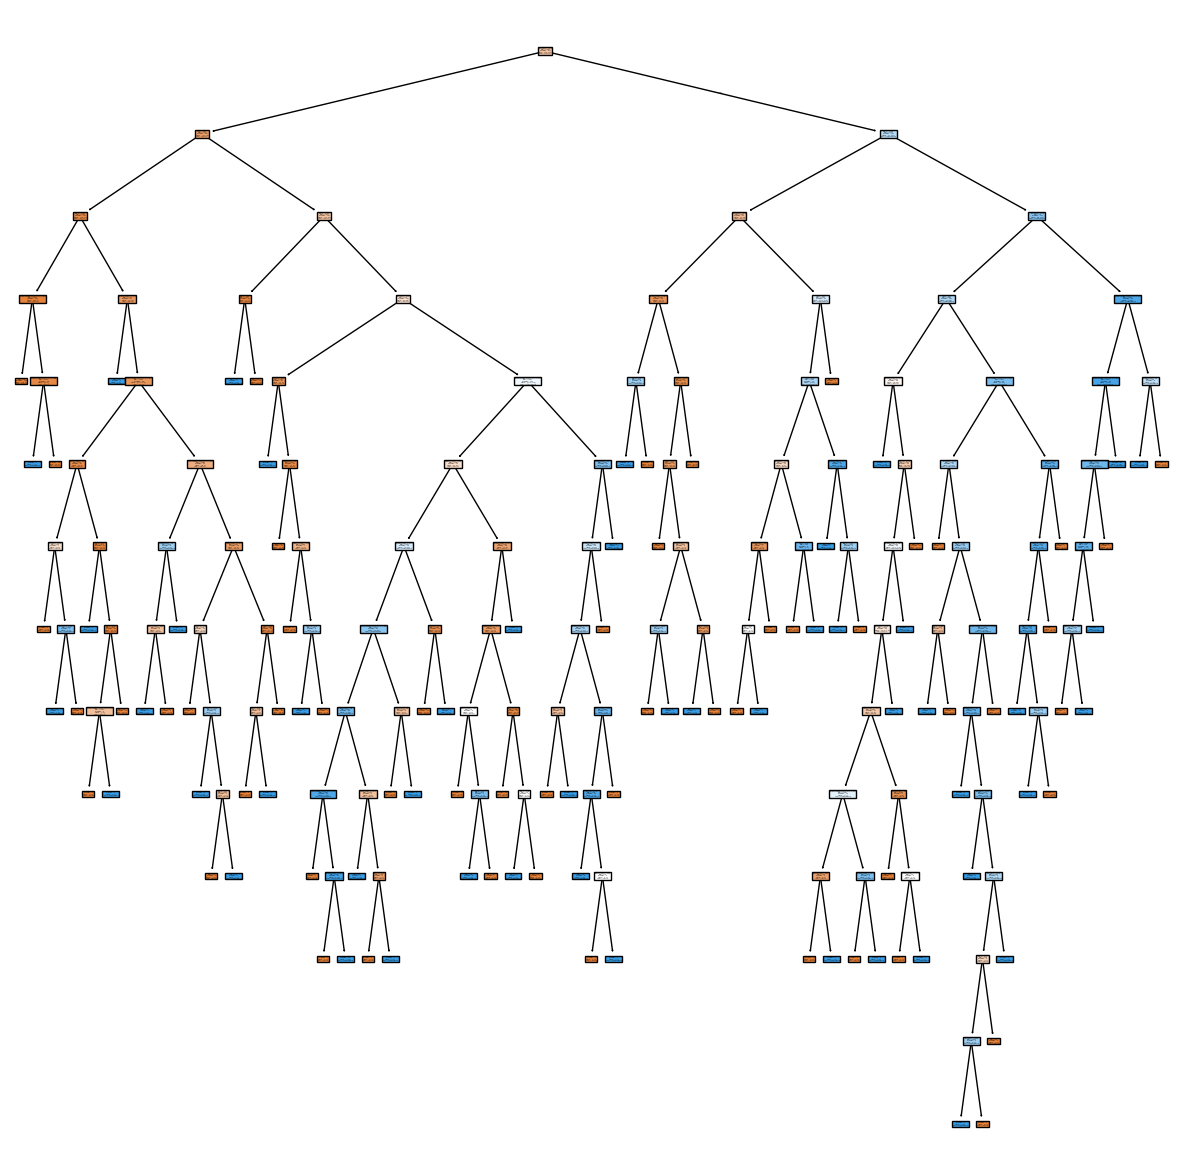

In [63]:
ig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"], filled = True)

plt.show()

In [64]:
X_train.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21


In [65]:
y[1]

np.int64(0)

In [66]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [67]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [68]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7467532467532467
F1 score Test:  0.7467532467532467
Precision Test:  0.7467532467532467
Recall Test:  0.7467532467532467
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0
